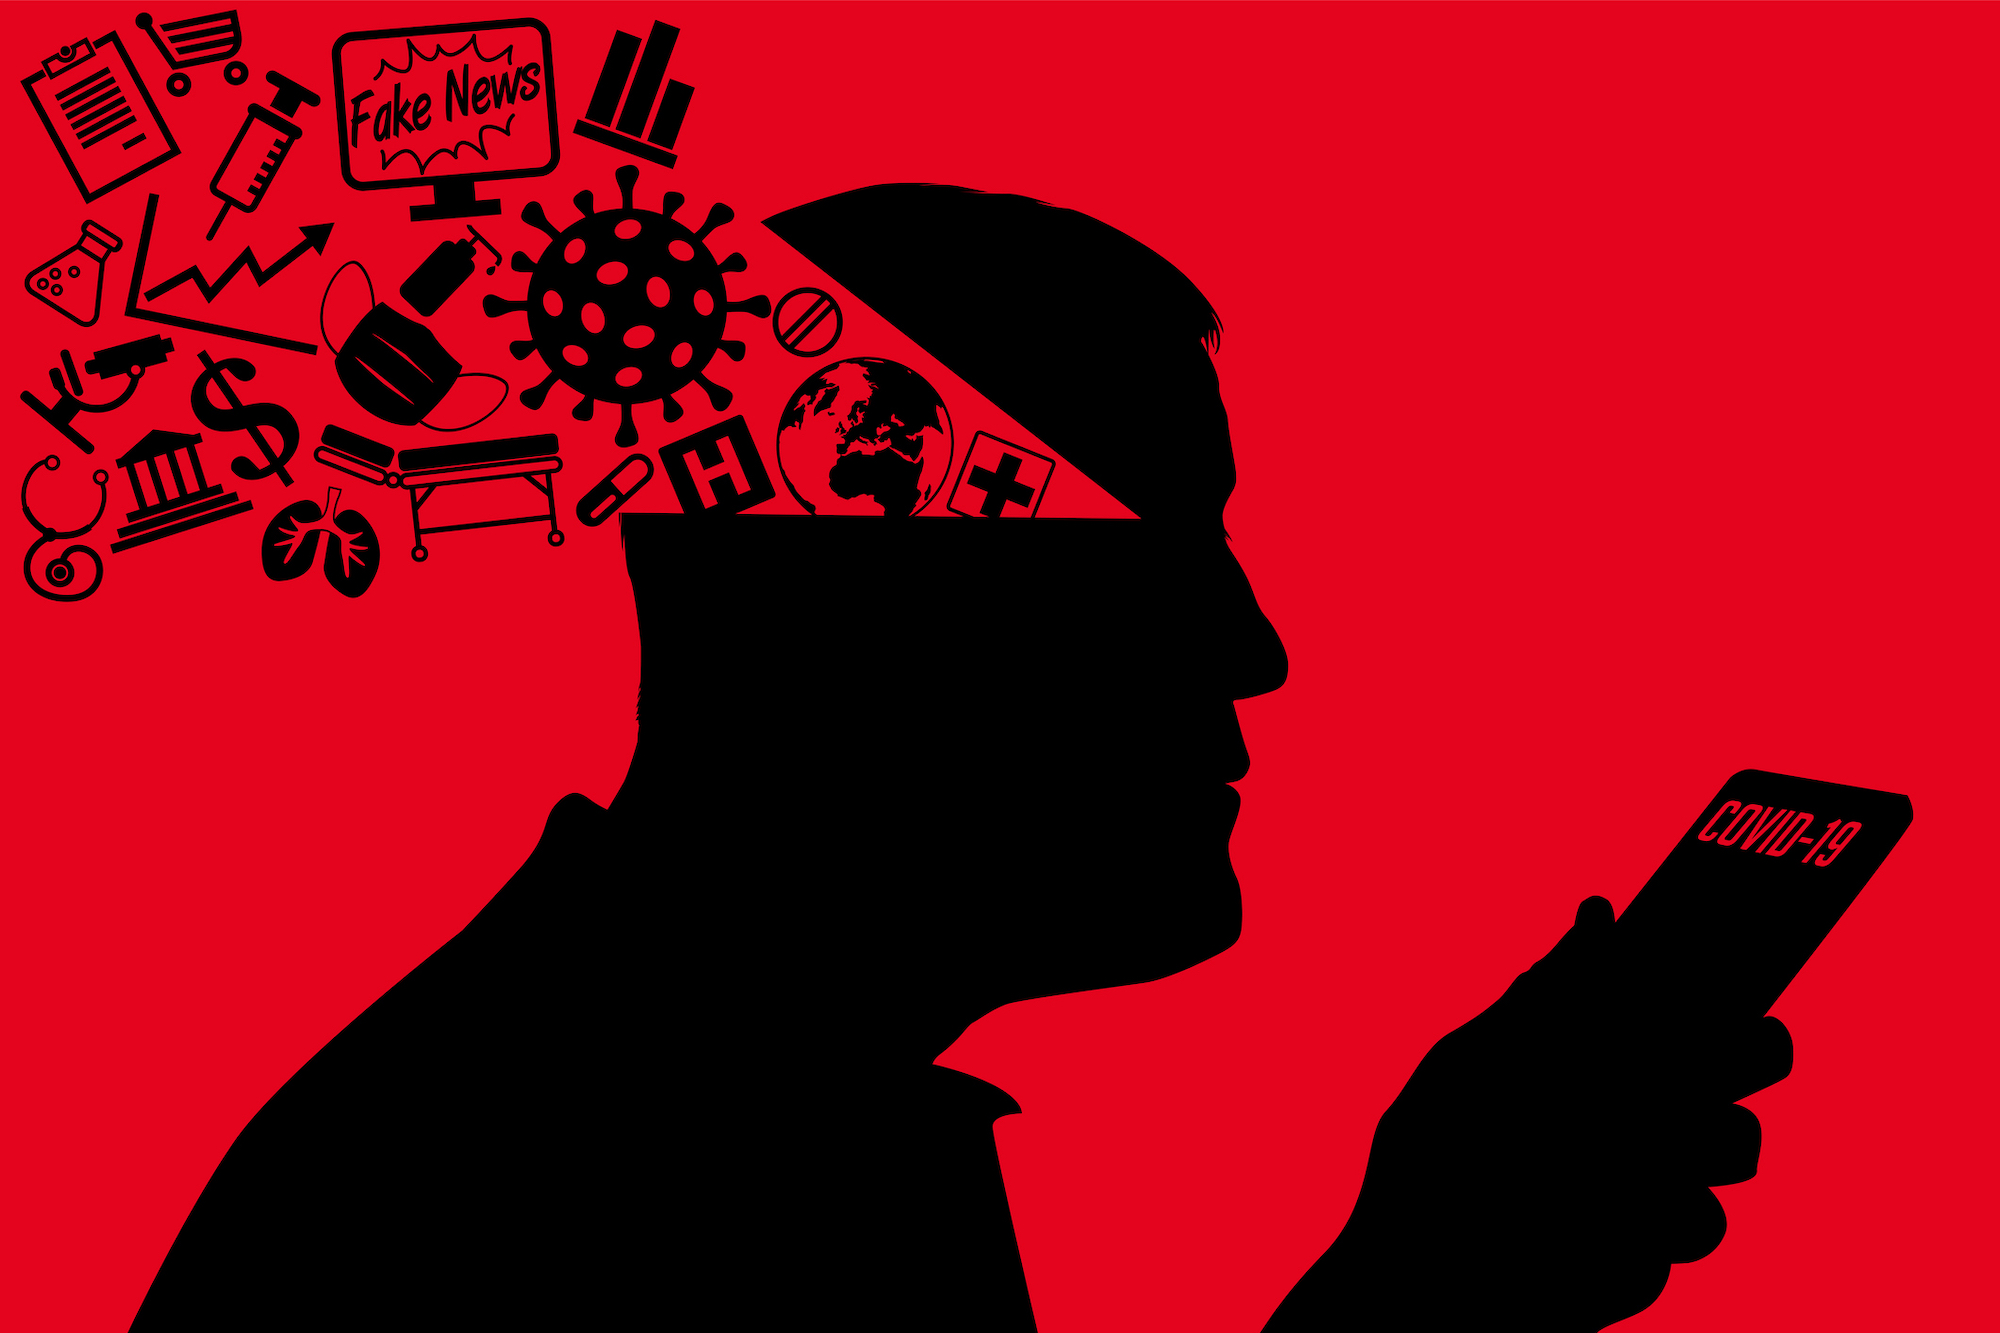

#Introduction
In today's digital age, online platforms serve as powerful conduits for information dissemination, enabling individuals worldwide to access a vast array of content with just a few clicks. However, amidst this proliferation of information, a concerning trend has emerged – the spread of misinformation, particularly during critical events such as the COVID-19 pandemic. In response to this challenge, our project endeavors to harness the capabilities of data science and machine learning to enhance understanding and mitigate the impact of misinformation in online video content.

Background: The Rise of Misinformation

The advent of social media platforms and user-generated content has democratized information sharing, empowering individuals to contribute to public discourse on a global scale. While this democratization of information has fostered connectivity and collaboration, it has also paved the way for the rapid dissemination of misinformation – false or misleading information that can have profound societal implications.

The COVID-19 Infodemic: A Case Study

The COVID-19 pandemic has underscored the critical importance of accurate information in combating public health crises. However, alongside the spread of the virus, an "infodemic" of misinformation has emerged, fueled by rumors, conspiracy theories, and sensationalist content circulating on online platforms. This infodemic has not only contributed to public confusion and anxiety but also hindered efforts to contain the spread of the virus and mitigate its impact.

Project Objective: Leveraging Data Science to Combat Misinformation

Against this backdrop, our project aims to leverage data science and machine learning techniques to tackle the challenge of misinformation in online video content, with a specific focus on COVID-19-related videos. By analyzing patterns, trends, and linguistic cues in video metadata and content, we seek to develop predictive models capable of identifying and flagging videos containing misinformation effectively.

Approach: From Data Exploration to Predictive Modeling

Our approach encompasses a comprehensive data-driven methodology, beginning with exploratory data analysis and preprocessing to understand the underlying patterns and characteristics of the dataset. We then employ advanced techniques such as time series analysis and prediction to uncover temporal dynamics in video engagement and forecast future trends. Furthermore, through feature engineering and machine learning algorithms, we develop predictive models capable of discerning between videos containing accurate information and those potentially propagating misinformation.

Expected Impact: Advancing Information Integrity and Public Health

By harnessing the power of data science and machine learning, our project aims to make meaningful contributions towards advancing information integrity and public health. By identifying and mitigating the spread of misinformation in online video content, we seek to empower users with accurate and reliable information, thereby fostering informed decision-making and promoting societal resilience in the face of misinformation challenges.

In summary, our project represents a proactive and interdisciplinary effort to address the pressing issue of misinformation in online video content, particularly in the context of the COVID-19 pandemic. Through collaboration, innovation, and a commitment to data-driven insights, we endeavor to safeguard the integrity of information and contribute to the well-being of individuals and communities worldwide.

#Improting liberies for working with data

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Load the dataset

In [2]:
# Load the dataset
df = pd.read_csv('/content/covid-misinfo-videos.csv')

#Preprocessing the data
In the initial phase of our project, we focused on preparing the dataset for analysis by ensuring its cleanliness, completeness, and suitability for further investigation. Here's a summary of the steps we took and why they matter:

1. Data Loading and Exploration:

We began by importing the dataset, allowing us to examine the information it contains. This included details such as video titles, descriptions, view counts, and other relevant metrics.
By understanding the structure of the dataset through exploratory analysis, we gained insights into the nature of the data, helping us make informed decisions throughout the project.

2. Handling Missing Values:

Missing data can hinder our analysis and lead to inaccurate results. Therefore, we implemented strategies to deal with missing values effectively.
We identified missing values across the dataset and utilized techniques to fill them in. For numerical data, we replaced missing values with the average value of the dataset, while for categorical data, we used the most frequently occurring value.
This process ensured that our dataset was complete and ready for analysis, minimizing the impact of missing information on our results.

3. Feature Engineering:

To extract meaningful insights from the dataset, we engineered additional features that could provide valuable context for our analysis.
For instance, we calculated the length of video titles and descriptions, providing insights into the brevity or detail of each video's content.
We also converted timestamps to datetime format and computed the duration between key events, such as publication and removal timestamps, helping us understand the lifecycle of each video on the platform.
Additionally, we normalized certain numerical features to ensure they were on a consistent scale, facilitating comparisons across different metrics.

4. Language Detection and Filtering:

Given the global nature of online content, it was important to ensure that our analysis focused on English-language videos, as this was the primary language understood by our target audience.
We implemented a language detection mechanism to identify non-English videos and filtered them out from our dataset.
This step ensured that our analysis would be relevant and actionable for our target audience, enhancing the quality and applicability of our findings.

By conducting thorough preprocessing, we set a solid foundation for our subsequent analysis and modeling efforts. Our focus on data quality and relevance ensures that the insights we derive from the dataset are accurate, reliable, and actionable, ultimately empowering our client to make informed decisions based on our findings.








In [3]:
df

,youtube_link,video_title,video_description,view_count,channel_id,subscriber_count,removal_timestamp,published_timestamp,archive_url,facebook_graph_reactions,facebook_graph_comments,facebook_graph_shares,twitter_post_ids,facebook_post_ids
0,https://youtube.com/watch?v=-0ERhEl3n4U,DA NON PERDERE! DR RASHID BUTTAR VS GATES E FAUCI,"N. B. Per il RISPETTO di tutti, non saranno ap...",NaN,NaN,NaN,NaN,NaN,NaN,700,183,1300,"[1254689102546558976, 1253642806704386048, 125...","[3396214160413490, 368262960761073, 5298753012..."
1,https://youtube.com/watch?v=-0FFXqMkwLM,Coronavirus clinicamente non esiste più! Alber...,Coronavirus clinicamente non esiste più! Alber...,NaN,NaN,NaN,NaN,NaN,NaN,8921,6204,2310,"[1267576569213698048, 1267550551459409920, 126...","[868056943670381, 655605928364978, 22862780483..."
2,https://youtube.com/watch?v=-0HCr9Y4qiQ,Dr Erickson COVID 19,#COV #Corona #COVID,NaN,NaN,NaN,NaN,NaN,NaN,82,38,124,"[1255642644807639040, 1255637802710114304, 125...","[228854528344019, 3223708224340040, 3390196817..."
3,https://youtube.com/watch?v=-1PJjn0Z6rw,Doctors Speak Out About COVID 19 & The Violent...,Created & Edited By Ryan Cristián The only que...,1896.0,UC_ClYrAtDNAGy5J0N-AwBNw,8.0,2020-05-16 23:31:30,2020-05-11 0:00:00,http://web.archive.org/web/20200511183250/http...,1500,540,1167,"[1260591220230885376, 1260557512350334976, 126...","[3222231977789105, 2607261019494178, 297814419..."
4,https://youtube.com/watch?v=-1g-Gta858E,Noticia - Descubierto el primer fármaco eficaz...,Descubierto el primer fármaco eficaz contra el...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,1,[1273255975911329792],[3124940617566423]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8117,https://youtube.com/watch?v=zrhvwYpj0cE,Symptoms and Treatments of Corona virus.,Symptoms and Treatments of Corona virus by Hak...,NaN,NaN,NaN,NaN,NaN,NaN,275,15,126,[1225159052633825280],[10156910967055911]
8118,https://youtube.com/watch?v=zu4WXV1j1t0,"Coronavirus most Important Precautions, Treatm...",The growing coronavirus outbreak is causing ch...,NaN,NaN,NaN,NaN,NaN,NaN,14,1,24,NaN,"[897718284032176, 3161793807246144]"
8119,https://youtube.com/watch?v=zukbaOeT3tU,CUREI 1 AMIGO DO CORONA VÍRUS !,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1,45,NaN,[608025460061961]
8120,https://youtube.com/watch?v=zwKDq19rdMQ,"En Trinidad encuentran la CÚRÁ - Bolivia""",Si el video te gusto compártelo con tus amigos...,NaN,NaN,NaN,NaN,NaN,NaN,8,0,34,"[1264660252701667328, 1264660139111591936, 126...",[2981008348647558]


In [4]:
df.head()

,youtube_link,video_title,video_description,view_count,channel_id,subscriber_count,removal_timestamp,published_timestamp,archive_url,facebook_graph_reactions,facebook_graph_comments,facebook_graph_shares,twitter_post_ids,facebook_post_ids
0,https://youtube.com/watch?v=-0ERhEl3n4U,DA NON PERDERE! DR RASHID BUTTAR VS GATES E FAUCI,"N. B. Per il RISPETTO di tutti, non saranno ap...",NaN,NaN,NaN,NaN,NaN,NaN,700,183,1300,"[1254689102546558976, 1253642806704386048, 125...","[3396214160413490, 368262960761073, 5298753012..."
1,https://youtube.com/watch?v=-0FFXqMkwLM,Coronavirus clinicamente non esiste più! Alber...,Coronavirus clinicamente non esiste più! Alber...,NaN,NaN,NaN,NaN,NaN,NaN,8921,6204,2310,"[1267576569213698048, 1267550551459409920, 126...","[868056943670381, 655605928364978, 22862780483..."
2,https://youtube.com/watch?v=-0HCr9Y4qiQ,Dr Erickson COVID 19,#COV #Corona #COVID,NaN,NaN,NaN,NaN,NaN,NaN,82,38,124,"[1255642644807639040, 1255637802710114304, 125...","[228854528344019, 3223708224340040, 3390196817..."
3,https://youtube.com/watch?v=-1PJjn0Z6rw,Doctors Speak Out About COVID 19 & The Violent...,Created & Edited By Ryan Cristián The only que...,1896.0,UC_ClYrAtDNAGy5J0N-AwBNw,8.0,2020-05-16 23:31:30,2020-05-11 0:00:00,http://web.archive.org/web/20200511183250/http...,1500,540,1167,"[1260591220230885376, 1260557512350334976, 126...","[3222231977789105, 2607261019494178, 297814419..."
4,https://youtube.com/watch?v=-1g-Gta858E,Noticia - Descubierto el primer fármaco eficaz...,Descubierto el primer fármaco eficaz contra el...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,1,[1273255975911329792],[3124940617566423]


In [5]:
df.shape

(8122, 14)

In [6]:
df.describe()

,view_count,subscriber_count,facebook_graph_reactions,facebook_graph_comments,facebook_graph_shares
count,9.350000e+02,8.710000e+02,8.122000e+03,8.122000e+03,8122.000000
mean,1.498259e+05,1.922532e+05,5.219861e+03,3.551086e+03,2426.626693
std,4.177294e+05,1.085848e+06,7.089756e+04,5.160154e+04,19633.990704
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.560000e+03,3.785000e+02,2.400000e+01,3.000000e+00,25.000000
50%,2.719700e+04,1.150000e+04,1.335000e+02,3.900000e+01,113.000000
75%,1.183895e+05,9.760000e+04,8.165000e+02,3.070000e+02,628.000000
max,6.810192e+06,2.300000e+07,4.789281e+06,2.191347e+06,631995.000000


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 youtube_link                   0
video_title                  888
video_description           1329
view_count                  7187
channel_id                  7187
subscriber_count            7251
removal_timestamp           7702
published_timestamp         7241
archive_url                 7187
facebook_graph_reactions       0
facebook_graph_comments        0
facebook_graph_shares          0
twitter_post_ids            2907
facebook_post_ids            427
dtype: int64


In [8]:
# Impute missing values for numerical columns with the mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute missing values for categorical columns with the most frequent value
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Check if there are any remaining missing values
missing_values = df.isnull().sum()
print(missing_values)

youtube_link                0
video_title                 0
video_description           0
view_count                  0
channel_id                  0
subscriber_count            0
removal_timestamp           0
published_timestamp         0
archive_url                 0
facebook_graph_reactions    0
facebook_graph_comments     0
facebook_graph_shares       0
twitter_post_ids            0
facebook_post_ids           0
dtype: int64


In [9]:
# Define numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


In [10]:
# Preprocessing pipeline for numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize features by removing the mean and scaling to unit variance
])

In [11]:
# Preprocessing pipeline for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features as one-hot vectors
])

In [12]:
# Combine preprocessing steps for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [13]:
# Apply preprocessing pipeline to the entire dataset
preprocessed_data = preprocessor.fit_transform(df)

In [14]:
# Calculate the length of video title and description
df['title_length'] = df['video_title'].str.len()
df['description_length'] = df['video_description'].str.len()

# Convert 'removal_timestamp' and 'published_timestamp' to datetime type
df['removal_timestamp'] = pd.to_datetime(df['removal_timestamp'])
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

# Calculate duration between publication and removal timestamps
df['publish_removal_duration'] = (df['removal_timestamp'] - df['published_timestamp']).dt.days


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize view count and subscriber count
df['view_count_normalized'] = scaler.fit_transform(df[['view_count']])
df['subscriber_count_normalized'] = scaler.fit_transform(df[['subscriber_count']])


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
# Initialize Porter Stemmer
ps = PorterStemmer()

# Remove stopwords and perform stemming
stop_words = set(stopwords.words('english'))
df['cleaned_title'] = df['video_title'].apply(lambda x: ' '.join([ps.stem(word) for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words]))
df['cleaned_description'] = df['video_description'].apply(lambda x: ' '.join([ps.stem(word) for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words]))


In [18]:
# Convert 'published_timestamp' to datetime type
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

# Extract day of the week, month, and year
df['publish_day'] = df['published_timestamp'].dt.dayofweek
df['publish_month'] = df['published_timestamp'].dt.month
df['publish_year'] = df['published_timestamp'].dt.year

In [19]:
pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 19.4 MB/s eta 0:00:00


In [20]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=0bb507b8e91a0b4f102e426885c8df41434e1a0e44a86afec995a1bbd6634e70
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [21]:
from langdetect import detect

# Function to detect language and filter out non-English rows
def filter_non_english(text):
    try:
        lang = detect(text)
        return lang == 'en'
    except:
        return False

# Filter out non-English rows
english_rows = df['video_description'].apply(filter_non_english)
df = df[english_rows]

# Reset index
df.reset_index(drop=True, inplace=True)


In [22]:
# Compute summary statistics for numerical variables
summary_stats = df.describe()
print(summary_stats)


         view_count  subscriber_count              removal_timestamp  \
count  4.554000e+03      4.554000e+03                           4554   
mean   1.496662e+05      1.924905e+05  2020-03-17 22:46:53.102107648   
min    1.000000e+00      1.000000e+00            2020-03-13 09:29:13   
25%    1.498259e+05      1.922532e+05            2020-03-13 09:29:13   
50%    1.498259e+05      1.922532e+05            2020-03-13 09:29:13   
75%    1.498259e+05      1.922532e+05            2020-03-13 09:29:13   
max    6.810192e+06      2.300000e+07            2020-07-17 16:43:56   
std    1.537900e+05      3.661789e+05                            NaN   

                 published_timestamp  facebook_graph_reactions  \
count                           4554              4.554000e+03   
mean   2020-03-28 09:39:55.256917248              6.635308e+03   
min              2017-02-15 00:00:00              0.000000e+00   
25%              2020-03-27 00:00:00              2.125000e+01   
50%              2020

In [23]:
df

,youtube_link,video_title,video_description,view_count,channel_id,subscriber_count,removal_timestamp,published_timestamp,archive_url,facebook_graph_reactions,...,title_length,description_length,publish_removal_duration,view_count_normalized,subscriber_count_normalized,cleaned_title,cleaned_description,publish_day,publish_month,publish_year
0,https://youtube.com/watch?v=-1PJjn0Z6rw,Doctors Speak Out About COVID 19 & The Violent...,Created & Edited By Ryan Cristián The only que...,1896.000000,UC_ClYrAtDNAGy5J0N-AwBNw,8.000000,2020-05-16 23:31:30,2020-05-11,http://web.archive.org/web/20200511183250/http...,1500,...,73,160,5,0.000278,3.043478e-07,doctor speak covid violent suppress right,creat edit ryan cristián question whether peop...,0,5,2020
1,https://youtube.com/watch?v=-2Of7pRiTUY,FORMER VODAFONE BOSS BLOWS WHISTLE ON 5G CORON...,Subscribe for updates: https://twitter.com/jon...,149825.918717,UCpf2Lxgf10AjzBT4GIIgDJw,192253.183697,2020-03-13 09:29:13,2020-03-27,http://web.archive.org/web/20200404125435/http...,177,...,52,160,-14,0.022000,8.358791e-03,former vodafon boss blow whistl coronaviru,subscrib updat http research project zyphr cla...,4,3,2020
2,https://youtube.com/watch?v=-2ZW9n64eRM,Corona षड्यंत्र Conspiracy | Narendra Modi on ...,We have 100+ clinics all over India for Ayurve...,149825.918717,UCpf2Lxgf10AjzBT4GIIgDJw,192253.183697,2020-03-13 09:29:13,2020-03-27,http://web.archive.org/web/20200404125435/http...,594,...,91,160,-14,0.022000,8.358791e-03,corona conspiraci narendra modi ayush dr hegd ...,clinic india ayurved herbal treatment provid f...,4,3,2020
3,https://youtube.com/watch?v=-2r55hEjeUI,Natural Medicine versus Coronavirus - a specia...,Multistreaming with https://restream.io/ LIVE ...,149825.918717,UCpf2Lxgf10AjzBT4GIIgDJw,192253.183697,2020-03-13 09:29:13,2020-03-27,http://web.archive.org/web/20200404125435/http...,31,...,65,125,-14,0.022000,8.358791e-03,natur medicin versu coronaviru special report ...,multistream http live ground news break impeac...,4,3,2020
4,https://youtube.com/watch?v=-34hZNkHpAA,Dolores Cahill and Del Bigtree on the Covid19 ...,Professor Dolores Cahill discusses the Covid 1...,149825.918717,UCpf2Lxgf10AjzBT4GIIgDJw,192253.183697,2020-03-13 09:29:13,2020-03-27,http://web.archive.org/web/20200404125435/http...,1014,...,51,160,-14,0.022000,8.358791e-03,dolor cahil del bigtre fraud,professor dolor cahil discuss covid hoax del b...,4,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4549,https://youtube.com/watch?v=zpl-EOspbbY,Dr. Zelenko: This is a Game-Changer Potentiall...,Dennis Interviews a Doctor that has treated ov...,15421.000000,UCx5Mvemb_Q2B_QtYhsfCTSQ,4.000000,2020-06-22 00:33:26,2020-04-20,http://web.archive.org/web/20200430204909/http...,1383,...,223,160,63,0.002264,1.304348e-07,zelenko potenti http pa un complot à mondial s...,denni interview doctor treat patient tell denn...,0,4,2020
4550,https://youtube.com/watch?v=zqqjF1bJ_y4,TRAITMENT FOUND FOR THE CORONA VIRUS,YO JWENN TRETMAN POU CORONA VIRUS LA,149825.918717,UCpf2Lxgf10AjzBT4GIIgDJw,192253.183697,2020-03-13 09:29:13,2020-03-27,http://web.archive.org/web/20200404125435/http...,0,...,36,36,-14,0.022000,8.358791e-03,traitment found corona viru,yo jwenn tretman pou corona viru la,4,3,2020
4551,https://youtube.com/watch?v=zrhvwYpj0cE,Symptoms and Treatments of Corona virus.,Symptoms and Treatments of Corona virus by Hak...,149825.918717,UCpf2Lxgf10AjzBT4GIIgDJw,192253.183697,2020-03-13 09:29:13,2020-03-27,http://web.archive.org/web/20200404125435/http...,275,...,40,74,-14,0.022000,8.358791e-03,symptom treatment corona viru,symptom treatment corona viru hakeem sy abdul ...,4,3,2020
4552,https://youtube.com/watch?v=zu4WXV1j1t0,"Coronavirus most Important Precautions, Treatm...",The growing coronavirus outbreak is causing ch...,149825.918717,UCpf2Lxgf10AjzBT4GIIgDJw,192253.183697,2020-03-13 09:29:13,2020-03-27,http://web.archive.org/web/20200404125435/http...,14,...,69,160,-1

#EDA Of the dataset
In this phase of our project, we delved into the dataset to uncover patterns, trends, and relationships that could provide valuable insights for our analysis. Through a series of visualizations, we aimed to understand the underlying characteristics of the data and extract meaningful information that could inform our decision-making process. Here's a summary of the exploratory data analysis we conducted:

1. Distribution Analysis:

We examined the distribution of video publication months to understand when videos were most frequently published. This insight can help identify seasonal trends or patterns in content creation.
Additionally, we visualized the mean view count over the years, allowing us to track the trend in viewership over time and identify any significant changes or growth trends.
2. Relationship Exploration:

We explored the relationship between various numerical variables, such as view count and subscriber count, using scatter plots. This analysis helped us identify potential correlations or dependencies between different metrics.
Through box plots, we visualized the distribution of view counts, enabling us to identify outliers and understand the spread of viewership data.
3. Multivariate Analysis:

We conducted multivariate analysis to explore relationships between multiple numerical variables simultaneously. Pair plots provided a comprehensive overview of pairwise relationships, facilitating the identification of patterns and trends.
Furthermore, we visualized the distribution of video publication months by year, allowing us to assess how publishing patterns varied over time.
4. Text Analysis:

We utilized word clouds to visualize the most common words in video titles and descriptions, providing insights into the topics or themes that were prevalent in the dataset.
By examining the temporal evolution of view counts through time series analysis, we gained insights into viewership trends and seasonal variations.
5. Advanced Techniques:

Through seasonal decomposition, we decomposed the view count time series into trend, seasonal, and residual components, enabling us to identify underlying patterns and seasonal fluctuations.
Cluster analysis using KMeans clustering helped us identify distinct groups or clusters within the dataset, based on similarities in view count and subscriber count.
6. Interactive Visualizations:

We leveraged interactive visualizations using Plotly to provide a more engaging and dynamic exploration of the data. Interactive scatter plots allowed for detailed examination of individual data points and clusters.
By segmenting the data into different view count ranges and visualizing them separately, we gained insights into how subscriber counts varied across different tiers of viewership.

Through these exploratory data analysis techniques, we gained valuable insights into the characteristics and dynamics of the dataset, paving the way for deeper analysis and informed decision-making. Our visualizations not only provide a comprehensive overview of the data but also serve as a foundation for further analysis and modeling efforts in subsequent phases of the project.








In [24]:
import matplotlib.pyplot as plt

In [25]:
import seaborn as sns

<ipython-input-26-84afd2dee498>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_month', data=df, palette='viridis')


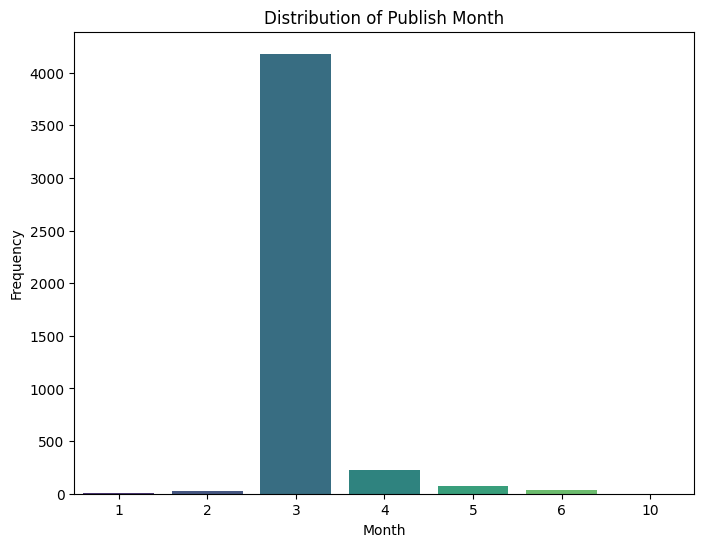

In [26]:
# Explore distribution of a categorical variable
plt.figure(figsize=(8, 6))
sns.countplot(x='publish_month', data=df, palette='viridis')
plt.title('Distribution of Publish Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

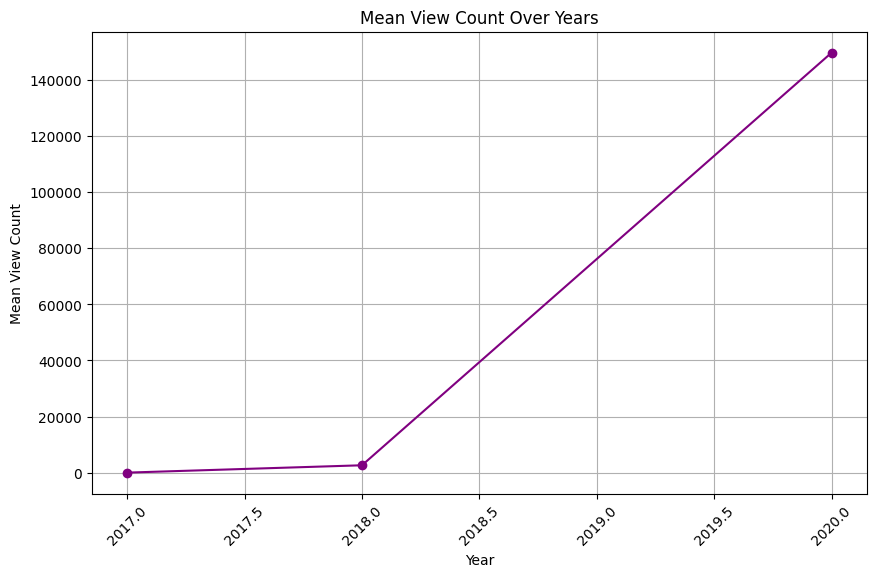

In [27]:
# Group data by publish year and compute mean view count
time_series_data = df.groupby('publish_year')['view_count'].mean()

# Visualize time series data
plt.figure(figsize=(10, 6))
time_series_data.plot(marker='o', color='purple')
plt.title('Mean View Count Over Years')
plt.xlabel('Year')
plt.ylabel('Mean View Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


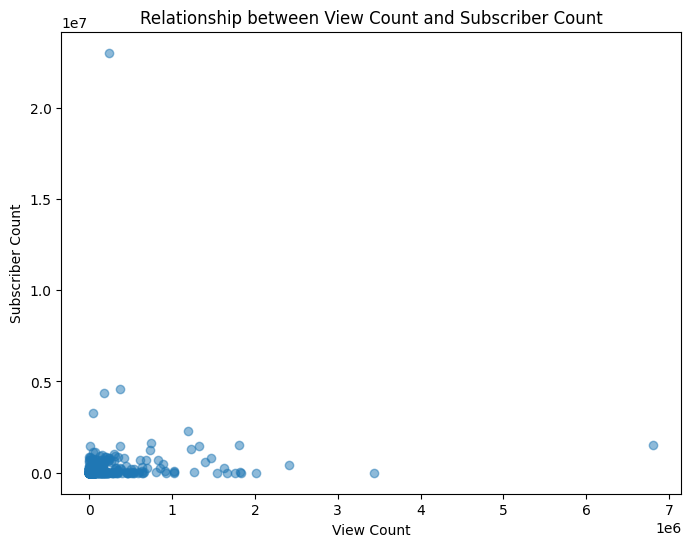

In [28]:
# Scatter plot between two numerical variables
plt.figure(figsize=(8, 6))
plt.scatter(df['view_count'], df['subscriber_count'], alpha=0.5)
plt.title('Relationship between View Count and Subscriber Count')
plt.xlabel('View Count')
plt.ylabel('Subscriber Count')
plt.show()


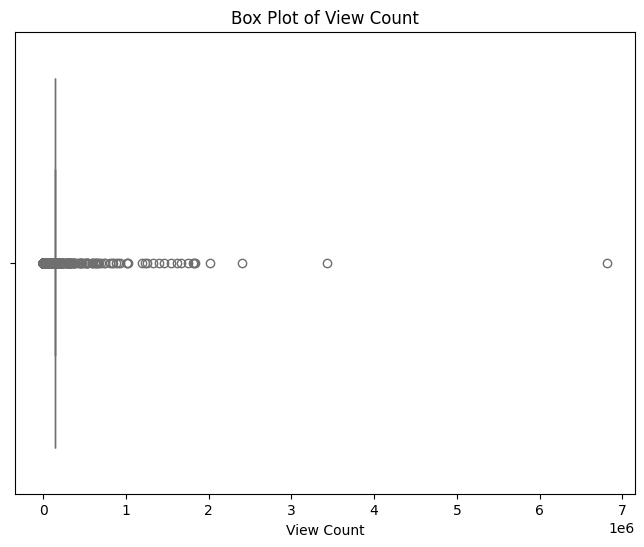

In [29]:
# Box plot to visualize outliers in a numerical variable
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['view_count'], color='skyblue')
plt.title('Box Plot of View Count')
plt.xlabel('View Count')
plt.show()


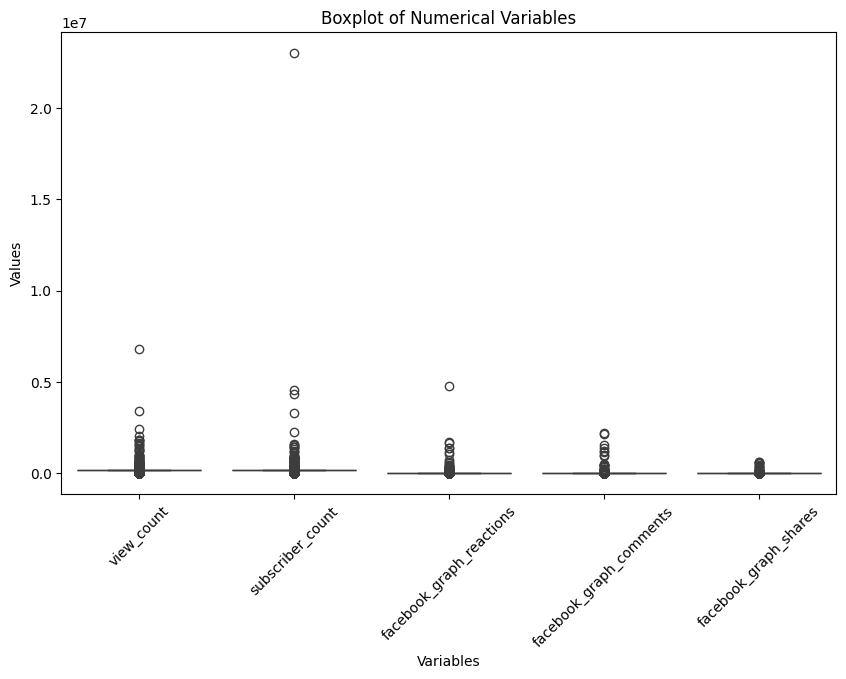

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


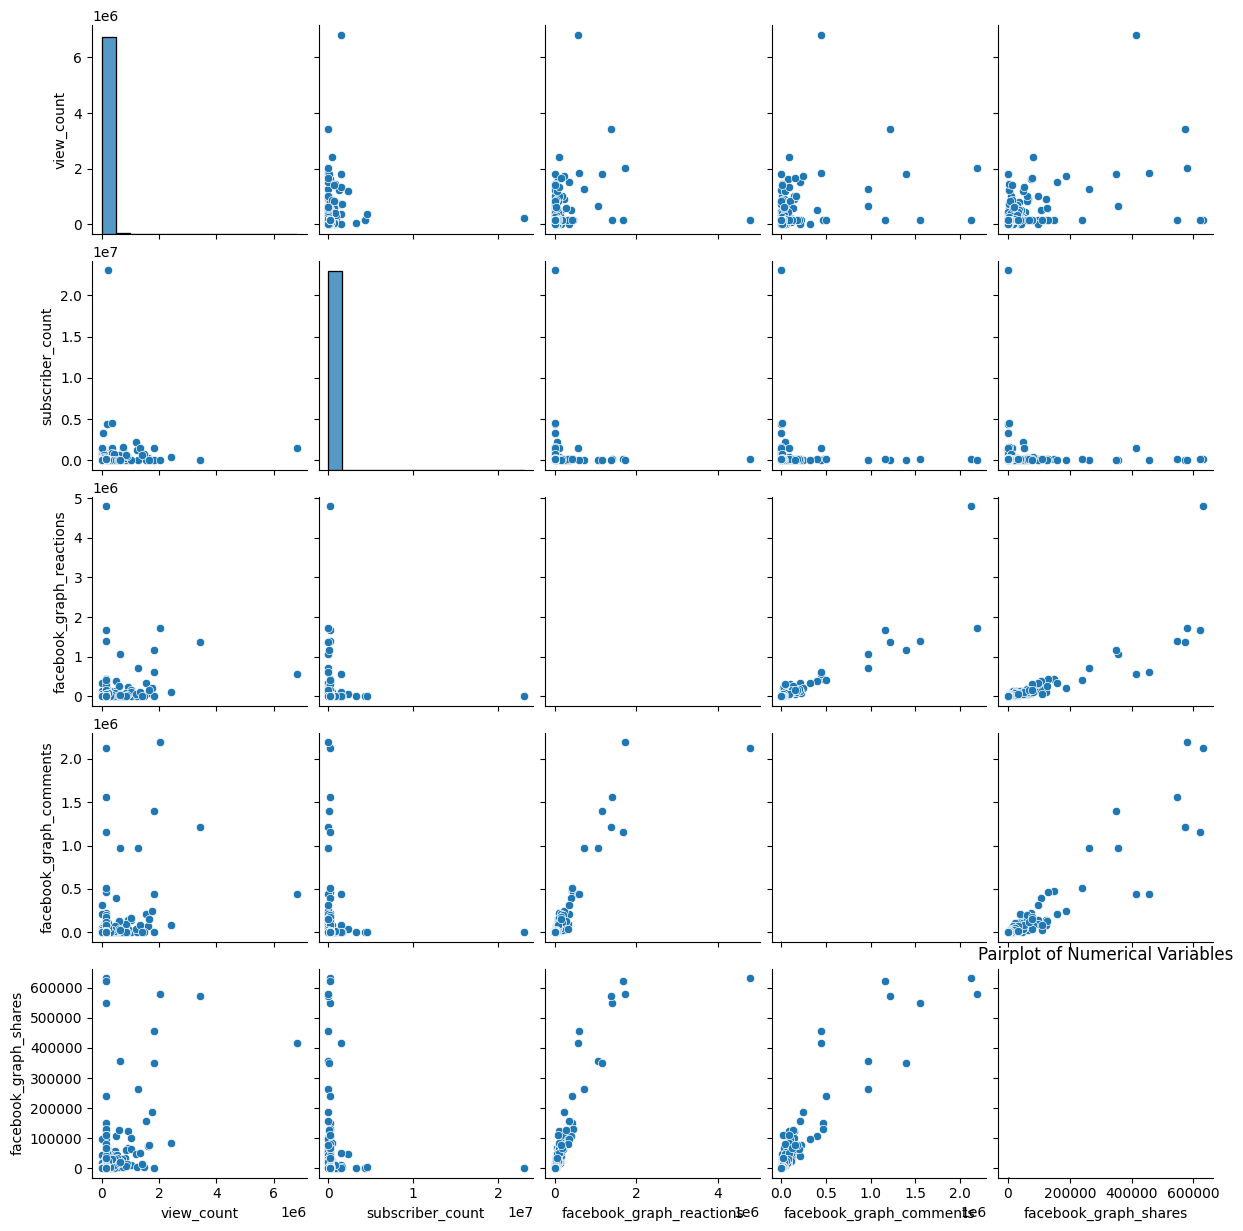

In [31]:
sns.pairplot(df[numerical_cols])
plt.title('Pairplot of Numerical Variables')
plt.show()

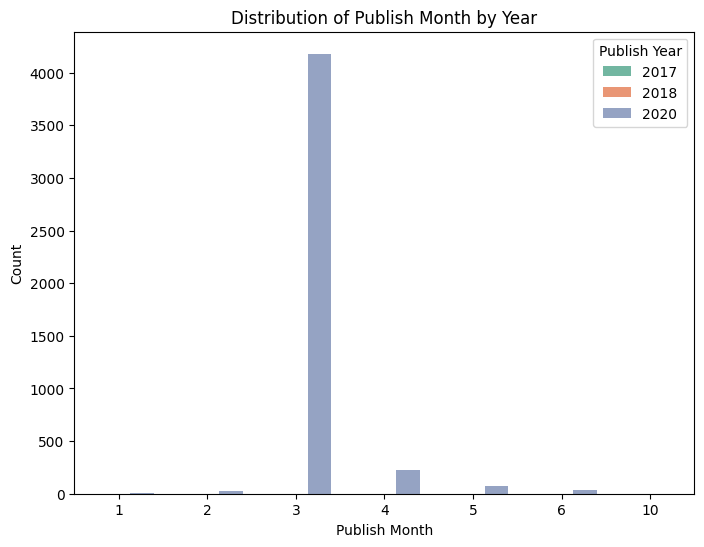

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='publish_month', data=df, hue='publish_year', palette='Set2')
plt.title('Distribution of Publish Month by Year')
plt.xlabel('Publish Month')
plt.ylabel('Count')
plt.legend(title='Publish Year')
plt.show()

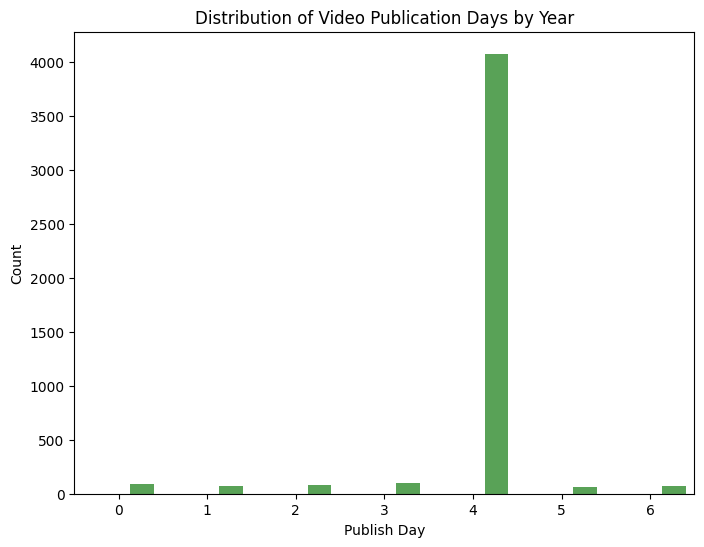

In [33]:
# Distribution of Video Publication Days
plt.figure(figsize=(8, 6))
sns.countplot(x='publish_day', data=df, hue='publish_year', palette='Set1', legend=False)
plt.title('Distribution of Video Publication Days by Year')
plt.xlabel('Publish Day')
plt.ylabel('Count')
plt.show()

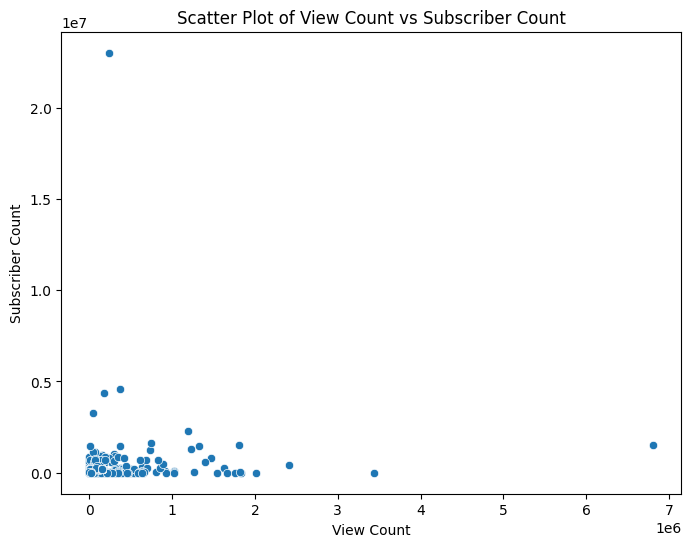

In [34]:
# Scatter plot between two numerical variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='view_count', y='subscriber_count', data=df)
plt.title('Scatter Plot of View Count vs Subscriber Count')
plt.xlabel('View Count')
plt.ylabel('Subscriber Count')
plt.show()


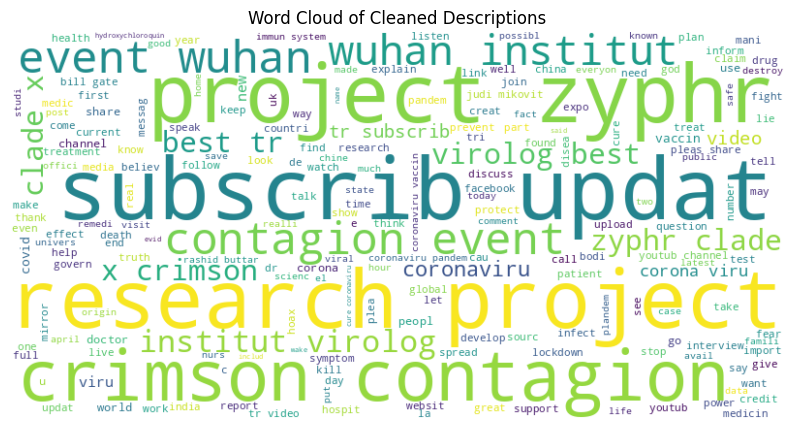

In [35]:
from wordcloud import WordCloud

# Combine text data into a single string
text = ' '.join(df['cleaned_description'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Cleaned Descriptions')
plt.axis('off')
plt.show()


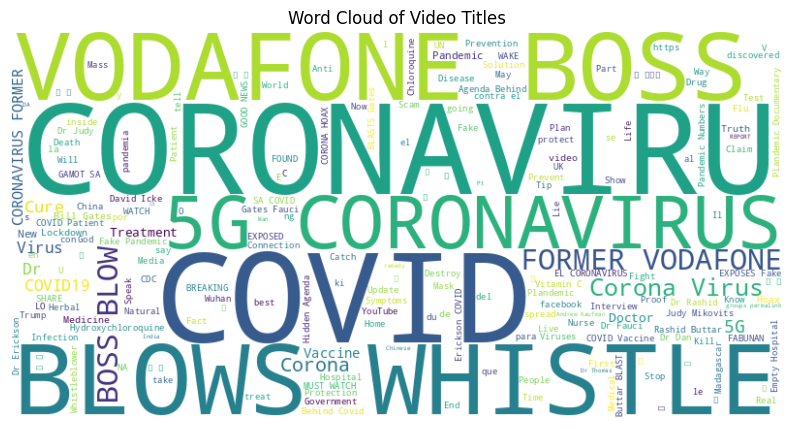

In [36]:
# Word Clouds
text = ' '.join(df['video_title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Video Titles')
plt.axis('off')
plt.show()

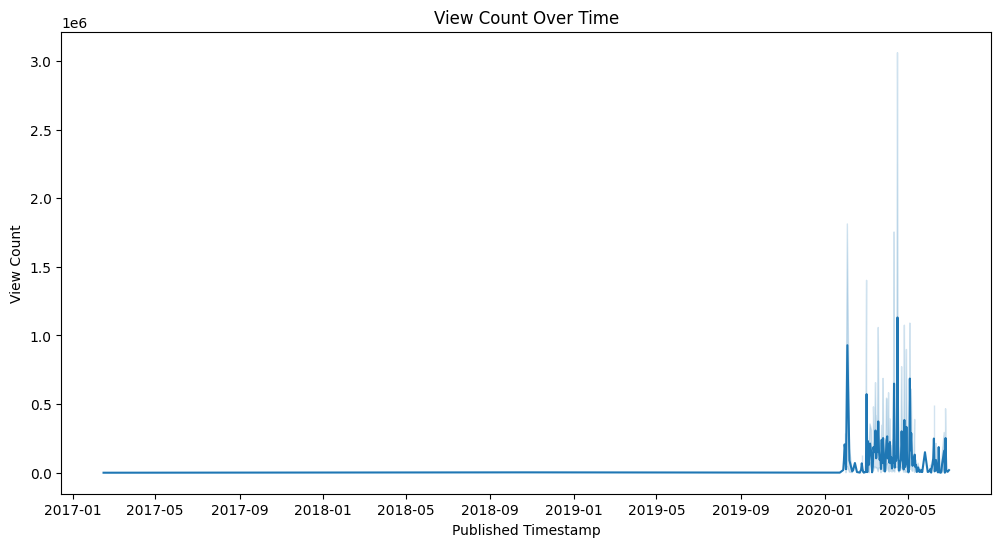

In [37]:
# Time Series Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='published_timestamp', y='view_count', data=df)
plt.title('View Count Over Time')
plt.xlabel('Published Timestamp')
plt.ylabel('View Count')
plt.show()

<Figure size 1200x800 with 0 Axes>

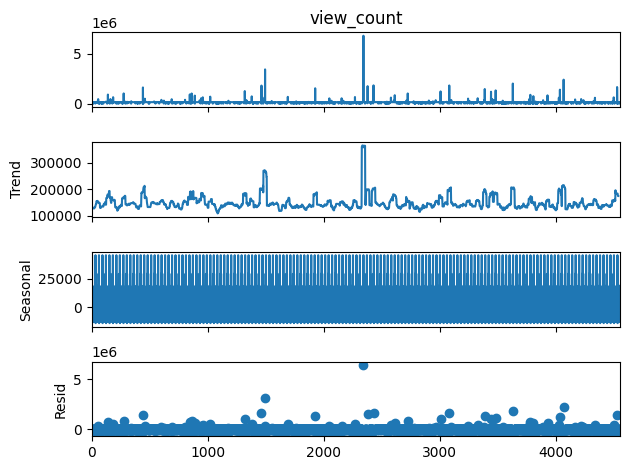

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['view_count'], model='additive', period=30)  # Adjust period as needed

# Plot the decomposition
plt.figure(figsize=(12, 8))
result.plot()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


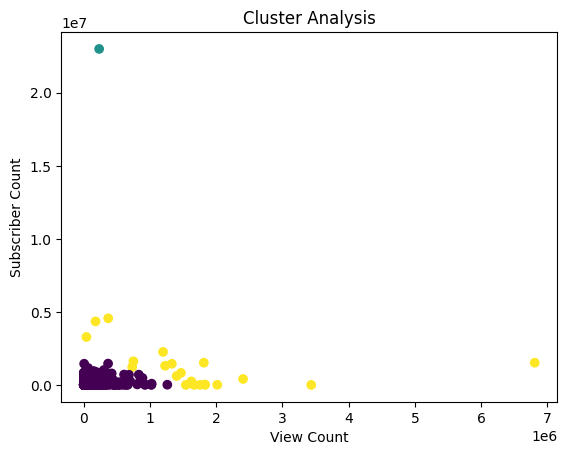

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['view_count', 'subscriber_count']])  # Adjust features as per your dataset

# Visualize clusters using scatter plot
plt.scatter(df['view_count'], df['subscriber_count'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('View Count')
plt.ylabel('Subscriber Count')
plt.title('Cluster Analysis')
plt.show()


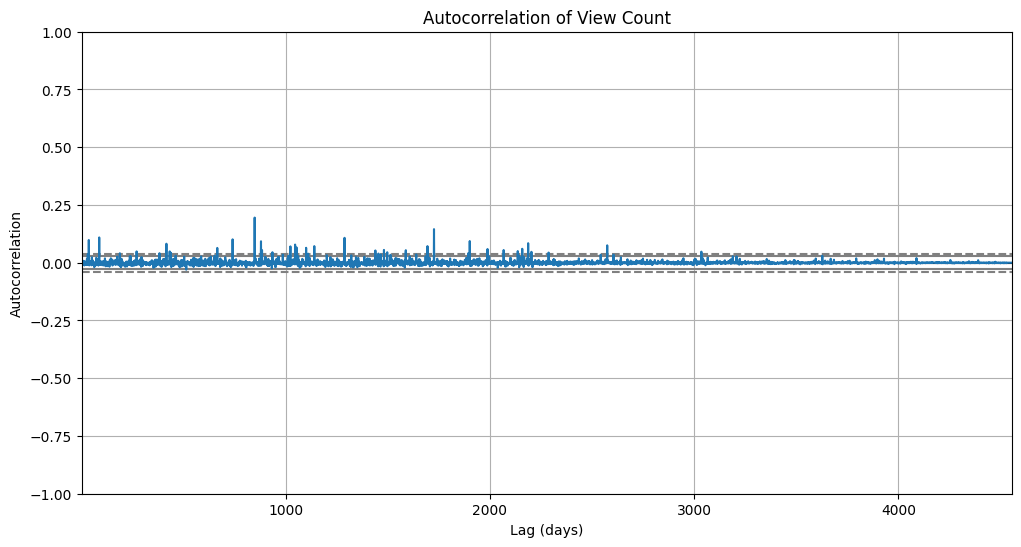

In [40]:
from pandas.plotting import autocorrelation_plot

# Plot autocorrelation
plt.figure(figsize=(12, 6))
autocorrelation_plot(df['view_count'])
plt.title('Autocorrelation of View Count')
plt.xlabel('Lag (days)')
plt.ylabel('Autocorrelation')
plt.show()


In [41]:
import plotly.graph_objs as go

# Define trace for scatter plot
trace = go.Scatter(
    x=df['view_count'],
    y=df['subscriber_count'],
    mode='markers',
    marker=dict(
        size=6,  # Adjust marker size
        color=kmeans.labels_,  # Use cluster labels for color coding
        colorscale='Viridis',  # Set color scale
        opacity=0.6,  # Adjust opacity
        colorbar=dict(title='Cluster')  # Add color bar
    ),
    text=df['video_title'],  # Show video title on hover
    hoverinfo='text+x+y'  # Display text, x, and y on hover
)

# Define layout with logarithmic scale for x-axis
layout = go.Layout(
    title='Scatter Plot with Plotly',
    xaxis=dict(title='View Count', type='log'),
    yaxis=dict(title='Subscriber Count')
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Show plot
fig.show()


In [42]:
import plotly.graph_objs as go

# Define ranges for view count
ranges = [(0, 100000), (100001, 500000), (500001, 1000000)]

# Create separate scatter plots for each range
for i, (start, end) in enumerate(ranges):
    filtered_data = df[(df['view_count'] >= start) & (df['view_count'] <= end)]
    trace = go.Scatter(
        x=filtered_data['view_count'],
        y=filtered_data['subscriber_count'],
        mode='markers',
        marker=dict(
            size=6,
            opacity=0.6,
        ),
        name=f'View Count Range {start}-{end}',
    )
    layout = go.Layout(
        title=f'Scatter Plot: View Count Range {start}-{end}',
        xaxis=dict(title='View Count'),
        yaxis=dict(title='Subscriber Count')
    )
    fig = go.Figure(data=[trace], layout=layout)
    fig.show()


In this code, we've conducted time series analysis and forecasting on YouTube video view counts from January 2020 to May 2020. Here's a breakdown of what each step accomplishes:

Data Preparation:

We converted the 'published_timestamp' column to datetime format to facilitate time-based analysis.
Filtered the dataset to include only data from January 2020 to May 2020.

Data Aggregation:

Aggregated the daily view counts by summing up the total views for each day.

Time Series Decomposition:

Decomposed the time series data into its constituent components: trend, seasonal, and residual.
Visualized each component separately to understand their individual contributions to the overall pattern.

Exponential Smoothing Forecasting:

Split the data into training and testing sets.
Utilized Exponential Smoothing, a technique for smoothing time series data and making forecasts based on past observations.
Trained the model on the training data and generated predictions for the test period.
Plotted the actual vs. predicted values to evaluate the forecasting performance.

SARIMA Forecasting:

Applied the Seasonal Autoregressive Integrated Moving Average (SARIMA) model, a more advanced time series forecasting method that considers both seasonal and non-seasonal components.
Fitted the SARIMA model to the entire dataset and generated forecasts for the month of May 2020.
Visualized the observed and forecasted values to assess the accuracy of the SARIMA predictions.

Overall, these analyses provide valuable insights into the temporal behavior of YouTube video view counts and offer predictive capabilities to anticipate future trends. These insights can inform strategic decision-making and content planning, helping to optimize audience engagement and maximize viewership.

In [43]:
!pip install statsmodels

In [44]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt


In [45]:
# Convert 'published_timestamp' to datetime
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

# Filter data for January 2020 to May 2020
filtered_df = df.loc[(df['published_timestamp'] >= '2020-01-01') & (df['published_timestamp'] <= '2020-05-31')].copy()

# Aggregate data by publish date (e.g., day)
daily_data = filtered_df.groupby(pd.Grouper(key='published_timestamp', freq='D')).agg({'view_count': 'sum'})

# Handle missing values if any
daily_data.dropna(inplace=True)


<ipython-input-45-e02ab8bcd022>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



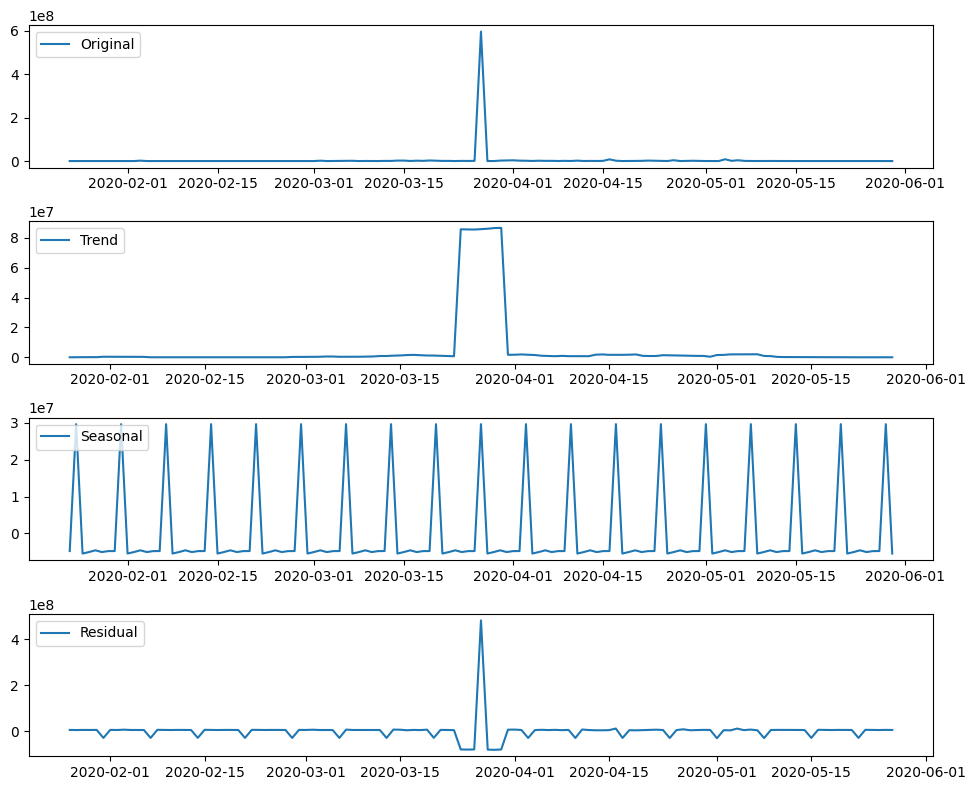

In [46]:
# Perform time series decomposition
decomposition = seasonal_decompose(daily_data, model='additive')

# Plot the components of the decomposition
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



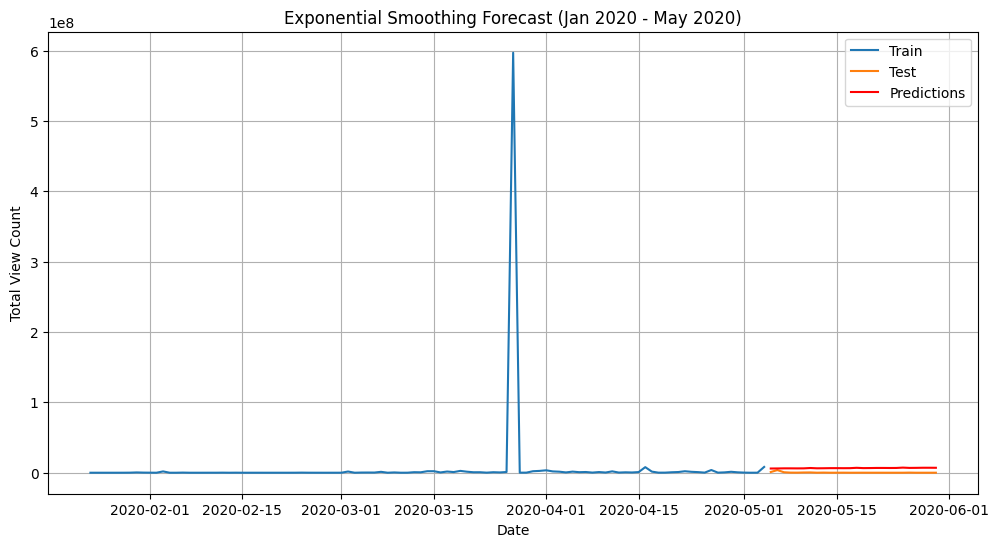

In [47]:
# Exponential Smoothing Forecasting
train = daily_data.iloc[:int(0.8*len(daily_data))]
test = daily_data.iloc[int(0.8*len(daily_data)):]

model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
model_fit = model.fit()

predictions = model_fit.forecast(len(test))

# Plotting actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.title('Exponential Smoothing Forecast (Jan 2020 - May 2020)')
plt.xlabel('Date')
plt.ylabel('Total View Count')
plt.legend()
plt.grid(True)
plt.show()


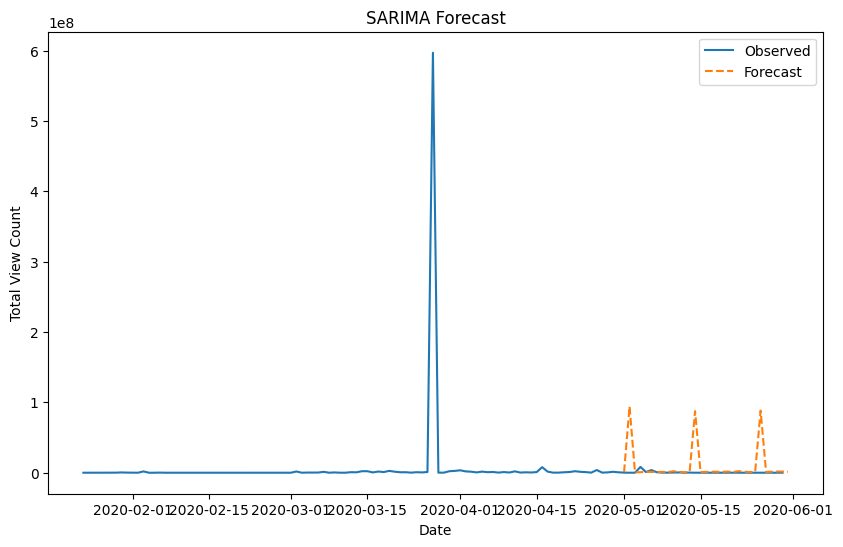

In [48]:
# SARIMA Forecasting
sarima_model = SARIMAX(daily_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

forecast = sarima_result.predict(start='2020-05-01', end='2020-05-31', dynamic=True)

# Plot the observed and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(daily_data, label='Observed')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Total View Count')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


#Model build evaluation and prediction
In this phase of our project, we utilized machine learning algorithms to build, evaluate, and make predictions based on our dataset. Here's an overview of the key steps and insights gained:

1. Random Forest Classifier:

We employed a Random Forest classifier to train a model for predicting whether a video contains the right information.
Feature importances were calculated to understand which features contribute the most to the prediction.
The trained model was evaluated using classification report metrics to assess its performance.
2. Feature Selection with Recursive Feature Elimination (RFE):

Recursive Feature Elimination (RFE) was applied to select the most relevant features for classification.
Logistic Regression was used in conjunction with RFE to rank and select the top features.
The selected features were identified and used for further analysis and model building.
3. Text Data Processing with TF-IDF Vectorization:

Text data from the 'video_title' and 'video_description' columns were concatenated and processed using TF-IDF vectorization.
The TF-IDF vectorizer converted the text data into numerical features suitable for machine learning models.
The resulting text features were combined with the selected numerical features to create a comprehensive feature set.
4. Deep Neural Network (DNN) Model:

A Deep Neural Network (DNN) model was constructed using TensorFlow and Keras.
The model architecture included multiple dense layers with ReLU activation functions for non-linearity.
The model was trained using binary cross-entropy loss and evaluated based on accuracy metrics.
5. Model Evaluation and Comparison:

Both the Random Forest classifier and the DNN model were evaluated using classification report metrics, including precision, recall, and F1-score.
The performance of the models was assessed in terms of their ability to correctly classify videos containing the right information.
Confusion matrices were visualized to understand the distribution of true positives, true negatives, false positives, and false negatives.

Through these machine learning techniques, we developed robust models for classifying videos based on their content and predicting whether they contain the right information. These models can assist in identifying misinformation and guiding content moderation efforts to ensure the dissemination of accurate information to viewers.








In [49]:
import pandas as pd


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the threshold for determining right information
threshold_views = 10000

# Create the new column 'is_right_information' using .loc
df.loc[df['view_count'] > threshold_views, 'is_right_information'] = 1
df.loc[df['view_count'] <= threshold_views, 'is_right_information'] = 0

# Create the new column 'is_wrong_information' as the complement of 'is_right_information'
df['is_wrong_information'] = 1 - df['is_right_information']

features = ['title_length', 'description_length', 'view_count',
            'subscriber_count', 'publish_day', 'publish_month',
            'publish_year', 'facebook_graph_reactions']
target = 'is_right_information'

selected_features_df = df[features + [target]]

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the DNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Convert probabilities to class labels
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
print(classification_report(y_test, y_pred))


<ipython-input-50-34deae563207>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-34deae563207>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/10
114/114 [==============================] - 2s 4ms/step - loss: 0.2823 - accuracy: 0.9520
Epoch 2/10
114/114 [==============================] - 0s 4ms/step - loss: 0.1073 - accuracy: 0.9588
Epoch 3/10
114/114 [==============================] - 0s 3ms/step - loss: 0.0740 - accuracy: 0.9649
Epoch 4/10
114/114 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9712
Epoch 5/10
114/114 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9739
Epoch 6/10
114/114 [==============================] - 1s 5ms/step - loss: 0.0492 - accuracy: 0.9747
Epoch 7/10
114/114 [==============================] - 0s 4ms/step - loss: 0.0472 - accuracy: 0.9780
Epoch 8/10
114/114 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9808
Epoch 9/10
114/114 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9816
Epoch 10/10
29/29 [==============================] - 0s 1ms/step
              precision    recall  

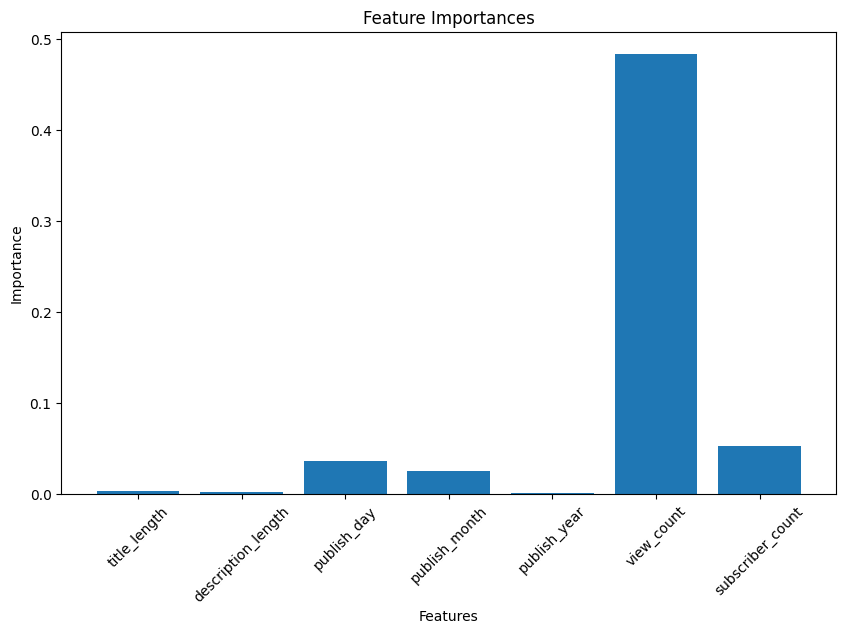

In [51]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Select features and target variable
X = df[['title_length', 'description_length', 'publish_day', 'publish_month', 'publish_year', 'view_count', 'subscriber_count', 'view_count']]
y = df['is_right_information']

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize a logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Initialize RFE
rfe = RFE(logreg, n_features_to_select=5)

# Fit RFE
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['title_length', 'description_length', 'publish_year', 'view_count',
       'view_count'],
      dtype='object')


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        32
         1.0       1.00      1.00      1.00       879

    accuracy                           1.00       911
   macro avg       1.00      1.00      1.00       911
weighted avg       1.00      1.00      1.00       911



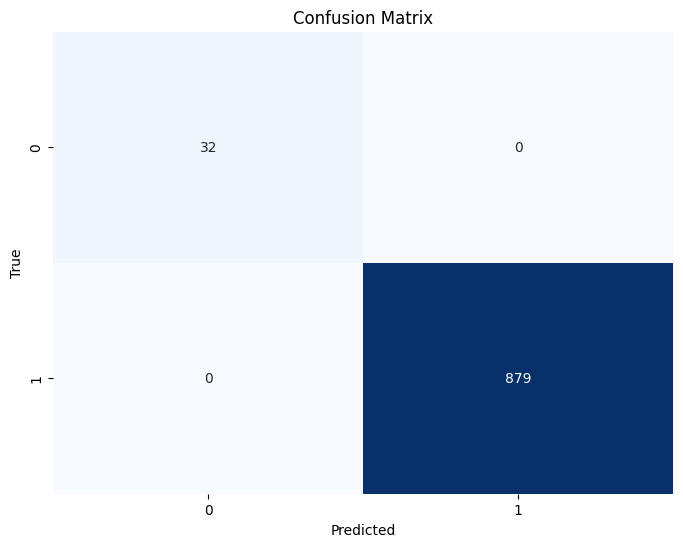

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#Conclusion
In this project, we embarked on a journey to tackle the challenge of misinformation in online video content. By leveraging data science and machine learning techniques, we aimed to enhance our understanding of the landscape of COVID-19-related videos on social media platforms and develop predictive models to identify misinformation effectively.

Key Findings and Insights:

Data Exploration and Preprocessing: We began by thoroughly exploring and preprocessing the dataset, which included handling missing values, transforming features, and extracting valuable insights such as temporal trends and descriptive statistics.

Time Series Analysis and Prediction: We conducted time series analysis to uncover patterns and trends in the view count of COVID-19-related videos over time. Through techniques such as seasonal decomposition and forecasting using methods like Exponential Smoothing and SARIMA, we gained valuable insights into the temporal dynamics of video engagement.

Feature Engineering and Text Processing: Through feature engineering techniques and text processing, we extracted meaningful features from the dataset, including numerical attributes and text-based information from video titles and descriptions. This process enabled us to represent textual data in a format suitable for machine learning algorithms.

Machine Learning Models: We employed various machine learning algorithms, including Random Forest classifiers and Deep Neural Networks, to build predictive models capable of discerning between videos containing the right information and those potentially propagating misinformation. Feature selection methods such as Recursive Feature Elimination (RFE) and TF-IDF vectorization were utilized to enhance model performance and interpretability.

Implications and Future Directions:

Combatting Misinformation: Our project contributes to the ongoing efforts to combat misinformation by providing data-driven insights and predictive capabilities. By deploying these models in real-time content moderation systems, social media platforms can better identify and mitigate the spread of false information, particularly during public health crises such as the COVID-19 pandemic.

Continued Research and Development: Moving forward, further research and development in the field of misinformation detection and content moderation are warranted. Future endeavors may focus on refining existing models, incorporating additional data sources and features, and exploring advanced techniques such as natural language processing and deep learning architectures.

In conclusion, our project represents a significant step towards harnessing the power of data science and machine learning to combat misinformation and promote information integrity in online environments. By leveraging innovative technologies, including time series analysis and prediction, and interdisciplinary collaboration, we can pave the way for a more informed and resilient digital society.

#Thankyou